In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df = pd.read_csv("C:\\Users\\İdris Aydın\\Desktop\\Cost_of_Living_Index_2022.csv")
df

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Afghanistan,20.37,2.72,12.09,14.92,12.41,23.04
1,2,Albania,35.50,8.47,22.83,29.32,25.82,30.19
2,3,Algeria,26.87,4.59,16.43,28.82,14.48,24.63
3,4,Argentina,34.69,7.71,22.04,28.17,33.32,30.72
4,5,Armenia,33.89,11.61,23.45,27.59,30.55,28.86
...,...,...,...,...,...,...,...,...
134,135,Venezuela,43.20,9.99,27.63,37.34,46.23,15.41
135,136,Vietnam,37.48,13.22,26.11,38.70,19.98,29.38
136,137,Yemen,53.14,6.71,31.38,67.12,24.74,14.41
137,138,Zambia,33.04,9.26,21.90,31.53,22.46,40.33


In [200]:
df = df.drop(columns = ['Rank'])
df

,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,Afghanistan,20.37,2.72,12.09,14.92,12.41,23.04
1,Albania,35.50,8.47,22.83,29.32,25.82,30.19
2,Algeria,26.87,4.59,16.43,28.82,14.48,24.63
3,Argentina,34.69,7.71,22.04,28.17,33.32,30.72
4,Armenia,33.89,11.61,23.45,27.59,30.55,28.86
...,...,...,...,...,...,...,...
134,Venezuela,43.20,9.99,27.63,37.34,46.23,15.41
135,Vietnam,37.48,13.22,26.11,38.70,19.98,29.38
136,Yemen,53.14,6.71,31.38,67.12,24.74,14.41
137,Zambia,33.04,9.26,21.90,31.53,22.46,40.33


In [60]:
df.isnull().sum()

Rank                              0
Country                           0
Cost of Living Index              0
Rent Index                        0
Cost of Living Plus Rent Index    0
Groceries Index                   0
Restaurant Price Index            0
Local Purchasing Power Index      0
dtype: int64

## ÜLKELERİN NEW YORK CİTY'E GÖRE YAŞAM MALİYETİ İNDEXİ KARŞILAŞTIRMASI

In [72]:
s = df[df['Cost of Living Index'] > 100.0] # Yaşam maliyeti indexi New York'tan daha fazla olan ülkeler
s

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
15,16,Bermuda,146.04,98.58,123.80,148.66,159.17,81.07
90,91,Norway,100.90,34.68,69.86,97.31,105.49,83.11
119,120,Switzerland,123.35,53.54,90.62,128.13,122.09,118.44


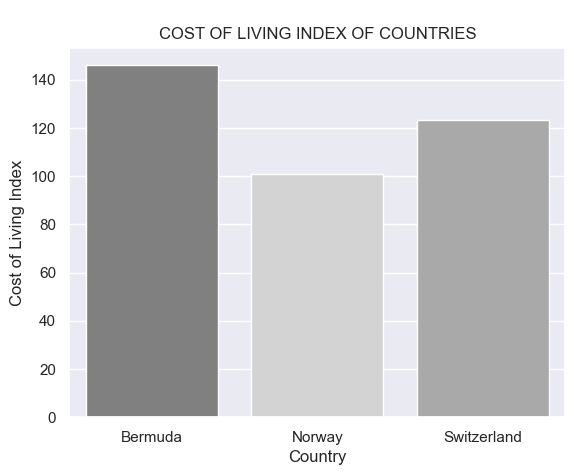

In [83]:
sns.barplot(x = s['Country'], y = s['Cost of Living Index'], data = s, hue = s['Country'], palette = ['gray', 'lightgray', 'darkgray'])
plt.title("\nCOST OF LIVING INDEX OF COUNTRIES")
plt.show()

In [102]:
sorted_df = df.sort_values(by = 'Cost of Living Index') # Yaşam maliyeti indexi New York'tan en düşük olan ülkeler
s = sorted_df.head(3)
s

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
92,93,Pakistan,19.92,3.91,12.42,17.81,15.54,26.63
0,1,Afghanistan,20.37,2.72,12.09,14.92,12.41,23.04
52,53,India,24.43,5.30,15.47,26.43,17.56,49.72


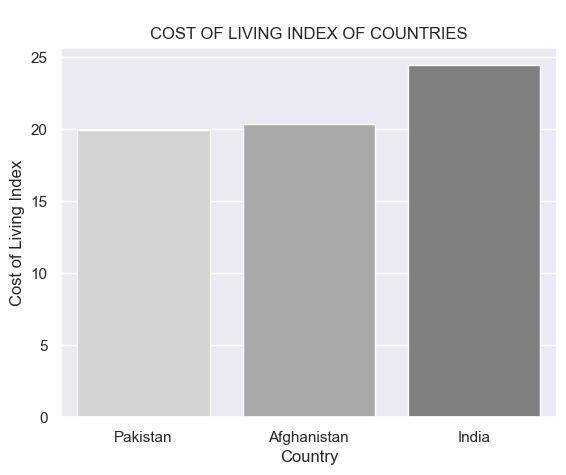

In [103]:
sns.barplot(x = s['Country'], y = s['Cost of Living Index'], data = s, hue = s['Country'], palette = ['lightgray', 'darkgray', 'gray'])
plt.title("\nCOST OF LIVING INDEX OF COUNTRIES")
plt.show()

In [108]:
s = df[df['Rent Index'] > 100.0]
s

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index


## Hiçbir ülkenin kira indexi New York City'den fazla değil!

In [127]:
sorted_df = df.sort_values(by = 'Rent Index')
s1 = sorted_df[:10]
s2 = sorted_df[len(sorted_df) - 10:len(sorted_df)]

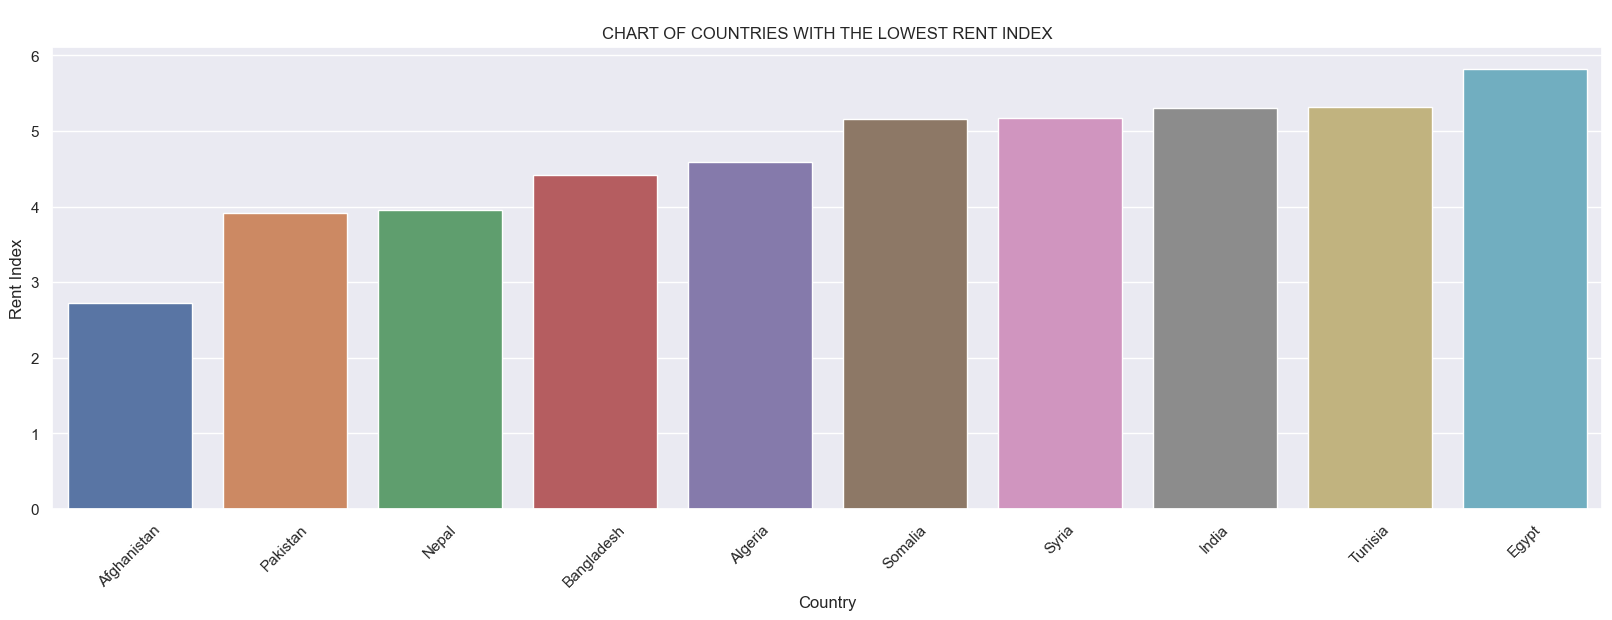

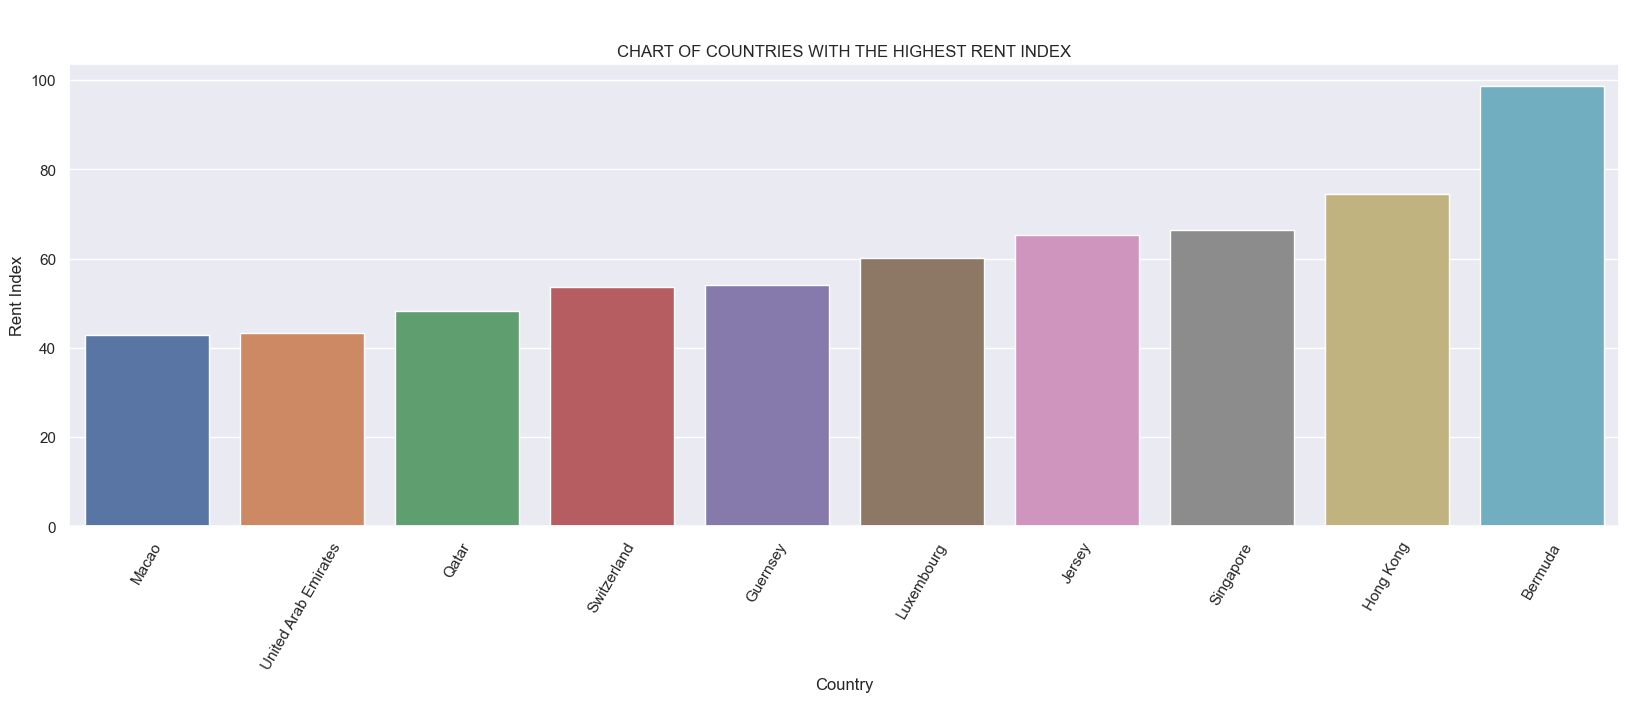

In [168]:
plt.figure(figsize = (20, 6))

sns.barplot(x = s1['Country'], y = s1['Rent Index'],hue = s1['Country'], data = s1)
plt.title("\nCHART OF COUNTRIES WITH THE LOWEST RENT INDEX")
plt.xticks(rotation = 45)
plt.show()

plt.figure(figsize = (20, 6))
sns.barplot(x = s2['Country'], y = s2['Rent Index'], hue = s2['Country'], data = s2)
plt.title("\n\nCHART OF COUNTRIES WITH THE HIGHEST RENT INDEX")
plt.xticks(rotation = 60)
plt.show()

In [137]:
d = df[['Cost of Living Index', 'Rent Index']]
d

,Cost of Living Index,Rent Index
0,20.37,2.72
1,35.50,8.47
2,26.87,4.59
3,34.69,7.71
4,33.89,11.61
...,...,...
134,43.20,9.99
135,37.48,13.22
136,53.14,6.71
137,33.04,9.26


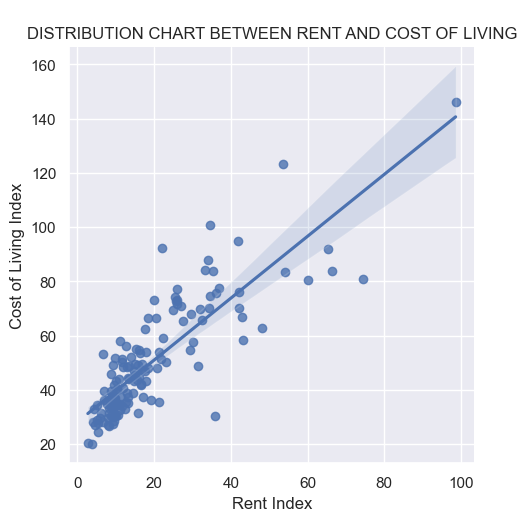

Correlation:0.838


In [159]:
sns.lmplot(x = 'Rent Index', y = 'Cost of Living Index', data = d)
plt.title("\nDISTRIBUTION CHART BETWEEN RENT AND COST OF LIVING")

correlation = round(d['Rent Index'].corr(df['Cost of Living Index']), 3)
plt.show()

print(f"Correlation:{correlation}")

 ## Yaşam maliyeti indexi ile kira indexi arasında güçlü bir doğrusal ilişki var.    (0.7 - 0.9)

In [161]:
sorted_df = df.sort_values(by = 'Groceries Index')
s = sorted_df[sorted_df['Groceries Index'] > 100.0]
s

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
119,120,Switzerland,123.35,53.54,90.62,128.13,122.09,118.44
15,16,Bermuda,146.04,98.58,123.80,148.66,159.17,81.07


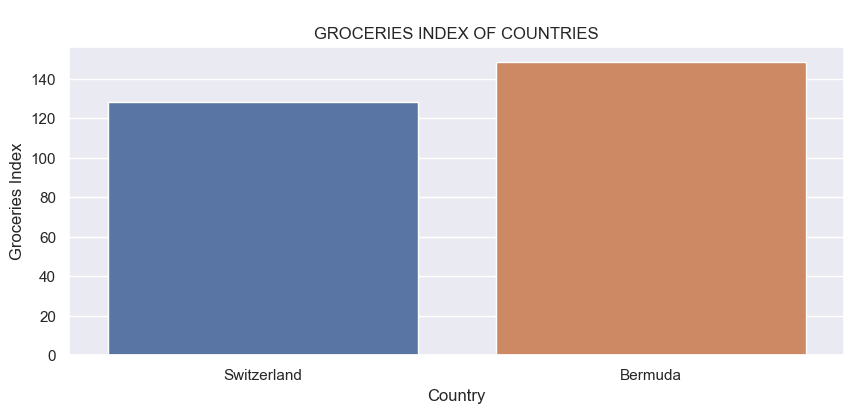

In [173]:
plt.figure(figsize = (10, 4))
sns.barplot(x = 'Country', y = 'Groceries Index', hue = 'Country', data = s)
plt.title("\nGROCERIES INDEX OF COUNTRIES")

plt.show()

In [174]:
s = sorted_df[len(sorted_df) - 10: len(sorted_df)]
s

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
109,110,Singapore,83.98,66.43,75.75,77.08,61.17,91.34
5,6,Australia,77.75,36.84,58.57,77.44,72.95,104.63
61,62,Japan,77.03,25.86,53.04,81.31,45.40,87.11
49,50,Hong Kong,80.71,74.57,77.83,84.72,58.58,65.74
11,12,Barbados,92.37,21.99,59.38,87.81,78.18,32.08
51,52,Iceland,94.86,41.93,70.05,90.22,99.42,77.06
114,115,South Korea,73.22,20.02,48.28,91.95,42.10,76.85
90,91,Norway,100.90,34.68,69.86,97.31,105.49,83.11
119,120,Switzerland,123.35,53.54,90.62,128.13,122.09,118.44
15,16,Bermuda,146.04,98.58,123.80,148.66,159.17,81.07


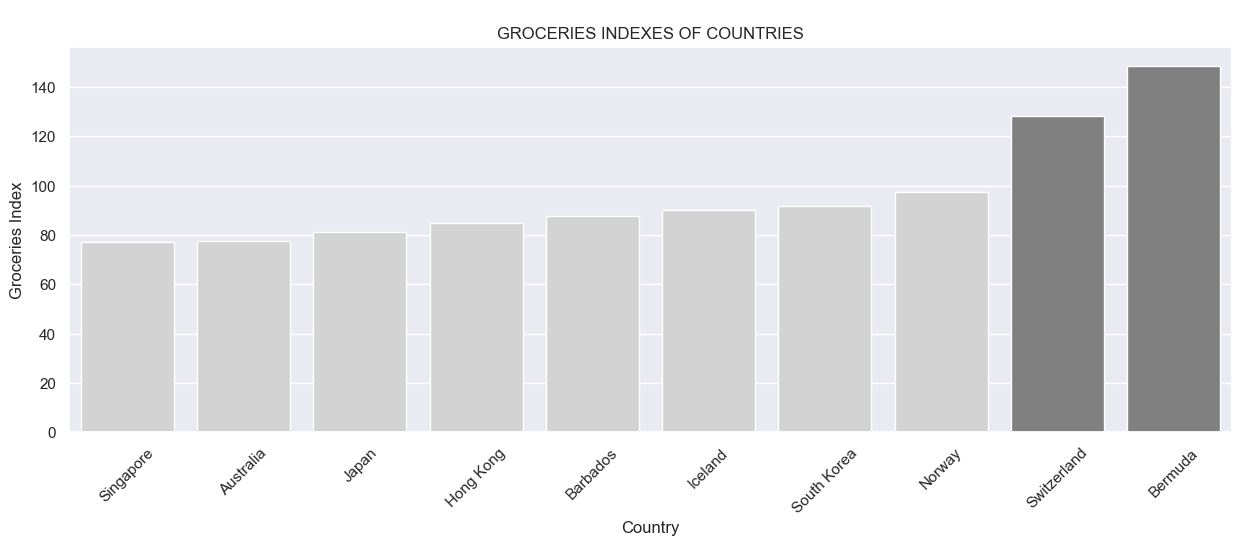

In [183]:
plt.figure(figsize = (15, 5))
sns.barplot(x = s['Country'], y = 'Groceries Index', hue = s['Country'], data = s, palette = ['lightgray','lightgray','lightgray','lightgray','lightgray','lightgray','lightgray','lightgray','gray','gray'])
plt.xticks(rotation = 45)
plt.title("\nGROCERIES INDEXES OF COUNTRIES")

plt.show()

## MARKET İNDEXİ NEW YORK CİTY'İ GEÇEN 2 ÜLKE VAR.     (SWITZERLAND, BERMUDA)

In [184]:
s = sorted_df[:10]
s

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Afghanistan,20.37,2.72,12.09,14.92,12.41,23.04
92,93,Pakistan,19.92,3.91,12.42,17.81,15.54,26.63
126,127,Turkey,28.31,6.63,18.15,22.64,18.40,32.88
26,27,Colombia,26.72,8.18,18.03,23.47,19.44,28.85
66,67,Kosovo (Disputed Territory),27.05,8.04,18.14,24.84,19.53,43.86
79,80,Moldova,30.35,8.70,20.20,24.96,27.10,33.43
64,65,Kazakhstan,28.68,9.44,19.66,25.35,27.24,32.23
95,96,Paraguay,30.20,10.04,20.75,25.45,24.19,26.08
128,129,Ukraine,30.71,10.57,21.27,26.30,25.75,37.22
52,53,India,24.43,5.30,15.47,26.43,17.56,49.72


## MARKET INDEXİ EN DÜŞÜK OLAN ÜLKELER...     (AFGHANISTAN, PAKISTAN...)

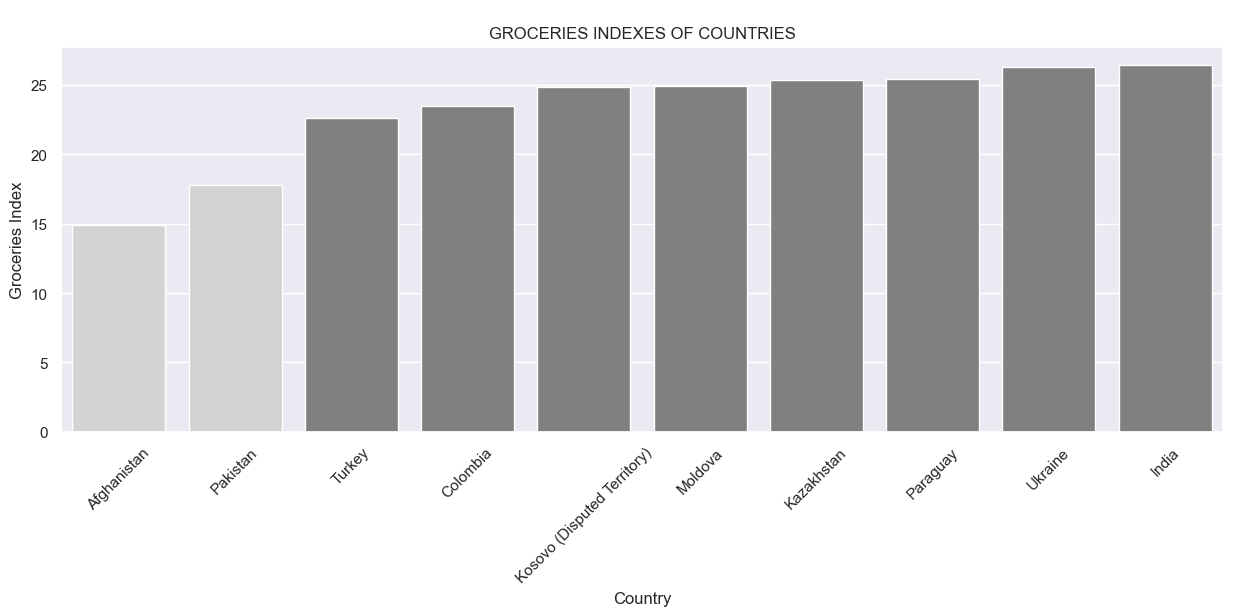

In [196]:
plt.figure(figsize = (15, 5))
sns.barplot(x = s['Country'], y = 'Groceries Index', hue = s['Country'], data = s, palette = ['lightgray','lightgray','gray','gray','gray','gray','gray','gray','gray','gray'])
plt.xticks(rotation = 45)
plt.title("\nGROCERIES INDEXES OF COUNTRIES")

plt.show()

In [189]:
d = df[['Cost of Living Index', 'Groceries Index']]
d

,Cost of Living Index,Groceries Index
0,20.37,14.92
1,35.50,29.32
2,26.87,28.82
3,34.69,28.17
4,33.89,27.59
...,...,...
134,43.20,37.34
135,37.48,38.70
136,53.14,67.12
137,33.04,31.53


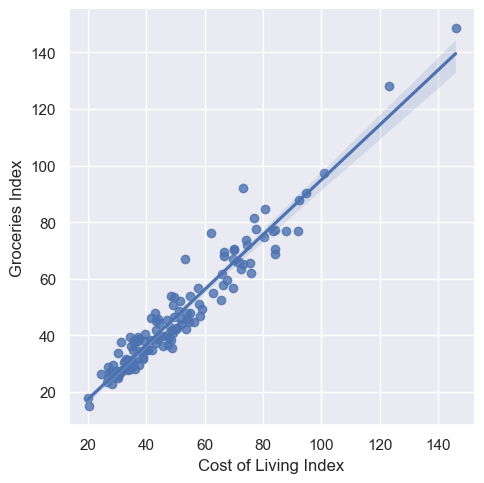

Correlation:0.965


In [192]:
sns.lmplot(x = 'Cost of Living Index', y = 'Groceries Index', data = d)

correlation = round(d['Groceries Index'].corr(d['Cost of Living Index']), 3)

plt.show()

print(f"Correlation:{correlation}")

## 1--> MARKET İNDEXİ İLE YAŞAM MALİYETİ ARASINDA OLDUKÇA GÜÇLÜ BİR DOĞRUSAL İLİŞKİ VAR. (0.965)

## 2 --> KİRA İNDEKSİ İLE OLAN İLİŞKİSİNDEN DAHA GÜÇLÜ BİR DOĞRUSAL İLİŞKİSİ OLDUĞUNU SÖYLEYEBİLİRİZ. (0.838)

In [202]:
d = df[df['Restaurant Price Index'] > 100.0]
d

,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
15,Bermuda,146.04,98.58,123.80,148.66,159.17,81.07
90,Norway,100.90,34.68,69.86,97.31,105.49,83.11
119,Switzerland,123.35,53.54,90.62,128.13,122.09,118.44


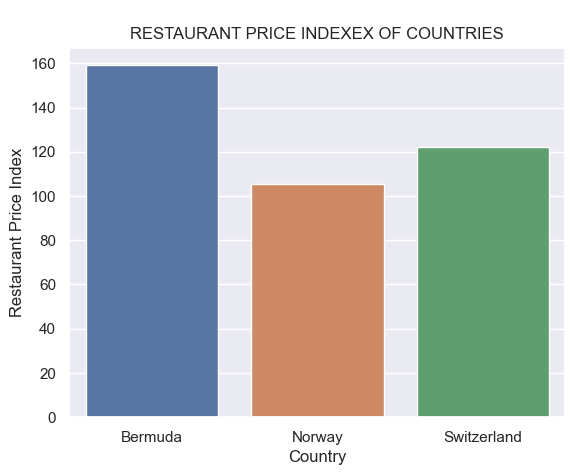

In [211]:
sns.barplot(x = 'Country', y = 'Restaurant Price Index', hue = 'Country', data = d)
plt.title("\nRESTAURANT PRICE INDEXEX OF COUNTRIES")

plt.show()

## RESTORAN FİYAT İNDEXİ NEW YORK CİTY'İ GEÇEN ÜLKELER (BERMUDA, NORWAY, SWITZERLAND)

In [228]:
sorted_df = df.sort_values(by = 'Restaurant Price Index')
s1 = sorted_df[:10]
s2 = sorted_df[len(sorted_df) - 10: len(sorted_df)]
s1

,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,Afghanistan,20.37,2.72,12.09,14.92,12.41,23.04
2,Algeria,26.87,4.59,16.43,28.82,14.48,24.63
92,Pakistan,19.92,3.91,12.42,17.81,15.54,26.63
125,Tunisia,27.87,5.32,17.30,27.36,15.96,27.83
116,Sri Lanka,31.29,8.23,20.48,37.67,17.27,19.27
52,India,24.43,5.30,15.47,26.43,17.56,49.72
53,Indonesia,35.85,9.82,23.65,38.29,17.74,21.07
38,Ethiopia,47.49,16.88,33.14,36.68,18.03,10.15
126,Turkey,28.31,6.63,18.15,22.64,18.40,32.88
26,Colombia,26.72,8.18,18.03,23.47,19.44,28.85


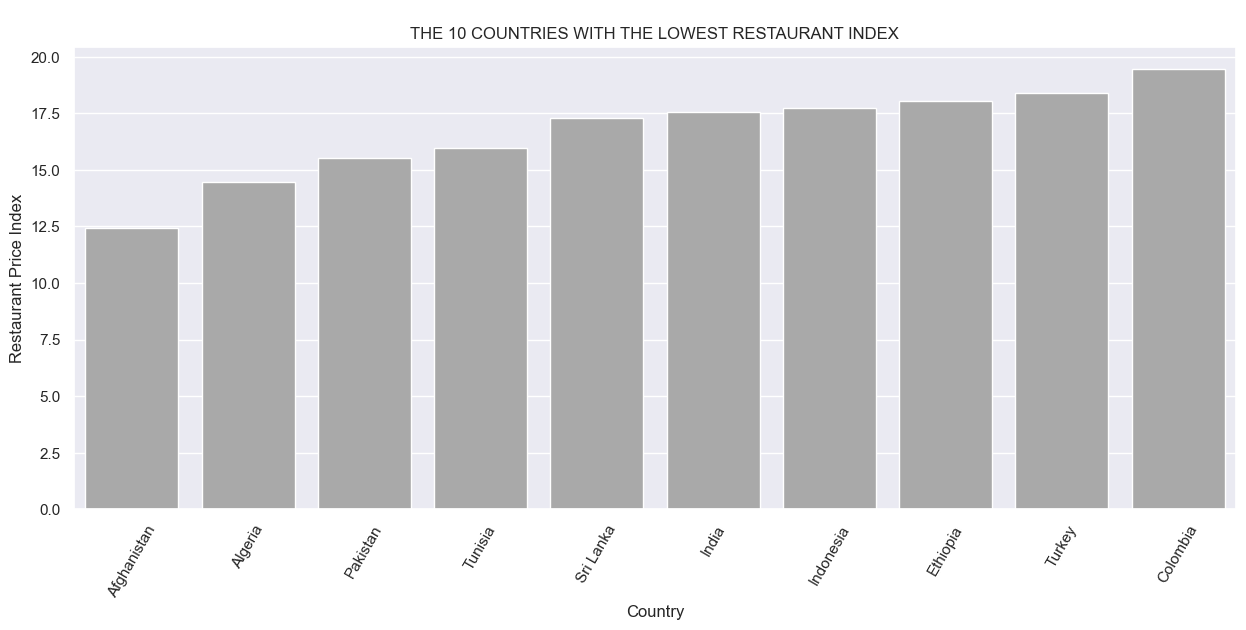

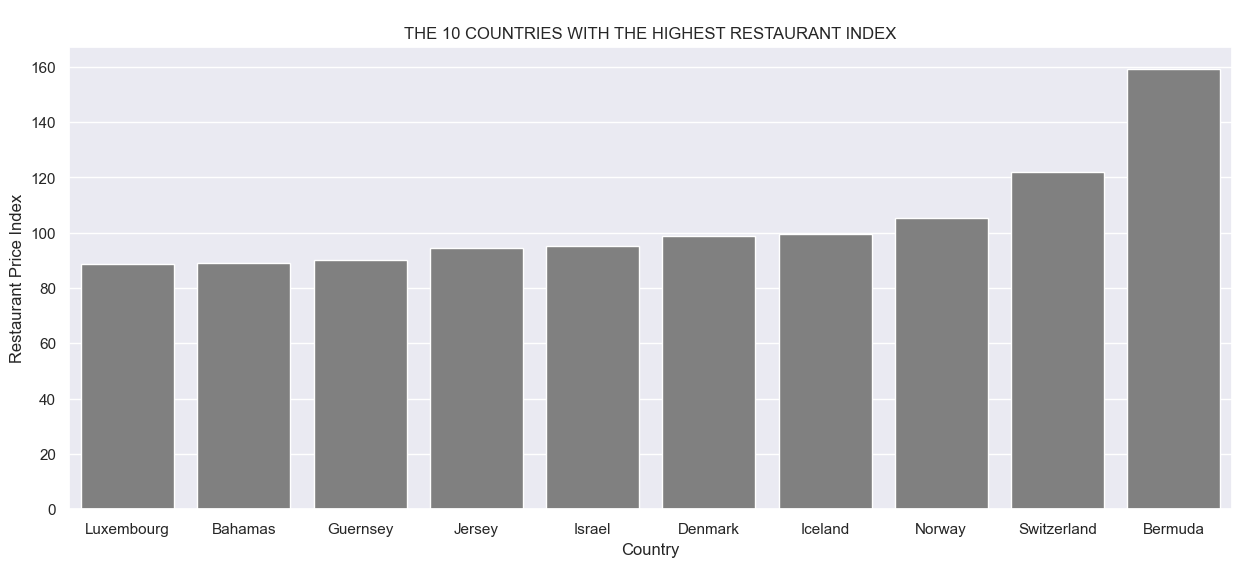

In [231]:
plt.figure(figsize = (15, 6))
sns.barplot(x = 'Country', y = 'Restaurant Price Index', data = s1, color = 'darkgray')
plt.xticks(rotation = 60)
plt.title("\nTHE 10 COUNTRIES WITH THE LOWEST RESTAURANT INDEX")

plt.show()


plt.figure(figsize = (15, 6))
sns.barplot(x = 'Country', y = 'Restaurant Price Index', data = s2, color = 'gray')
plt.title("\nTHE 10 COUNTRIES WITH THE HIGHEST RESTAURANT INDEX")

plt.show()

In [232]:
d = df[['Cost of Living Index', 'Restaurant Price Index']]
d

,Cost of Living Index,Restaurant Price Index
0,20.37,12.41
1,35.50,25.82
2,26.87,14.48
3,34.69,33.32
4,33.89,30.55
...,...,...
134,43.20,46.23
135,37.48,19.98
136,53.14,24.74
137,33.04,22.46


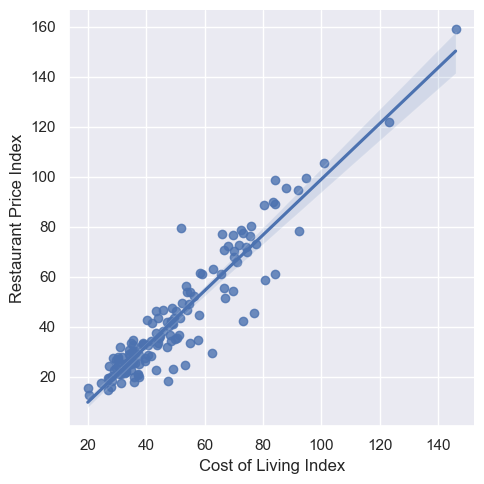

Correlation:0.935


In [235]:
sns.lmplot(x = 'Cost of Living Index', y = 'Restaurant Price Index', data = d)

correlation = round(d['Restaurant Price Index'].corr(d['Cost of Living Index']), 3)

plt.show()

print(f"Correlation:{correlation}")

## RESTORAN FİYAT İNDEXİ İLE YAŞAM MALİYETİ İNDEXİ ARASINDA GÜÇLÜ DOĞRUSAL BİR İLİŞKİ VAR.  (0.934)

In [240]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [266]:
X = df[['Groceries Index', 'Restaurant Price Index']]
y = df['Cost of Living Index']

In [267]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [268]:
model = LinearRegression()

In [269]:
model.fit(X_train, y_train)

LinearRegression()

In [270]:
prediction = model.predict(X_test)

In [271]:
print("Mean Squared Error:", mean_squared_error(y_test, prediction))
print("R^2 Score:", r2_score(y_test, prediction))

Mean Squared Error: 11.363572785286097
R^2 Score: 0.9671118300000571


In [272]:
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Model Coefficients: [0.57003997 0.36714057]
Model Intercept: 7.692269129731173


In [275]:
dataFrame = pd.DataFrame({
    'Groceries Index': [75],
    'Restaurant Price Index': [40]
})

myPredict = model.predict(dataFrame)
print(myPredict)

[65.13088937]
